## Lab 1. Koryakina Tatyana

Import libriaries for parsing

In [6]:
import sqlite3
import urllib.request
from bs4 import BeautifulSoup
import requests
import string

Writing url and path for proxy servic certificate

In [18]:
url='https://www.tdcj.texas.gov/death_row/dr_executed_offenders.html'
path = 'C:\\Users\\Tanya\\Desktop\\tpu\\Kaida\\lab1\\'

Writing requests and retrieving information about prisoners in sql DB

In [19]:
response = requests.get(
    url,
    proxies={
        "http": "http://a75c765efde041c7a4326ac99eac3e63:@proxy.crawlera.com:8011/",
        "https": "http://a75c765efde041c7a4326ac99eac3e63:@proxy.crawlera.com:8011/",
    },
    verify=(path+'zyte-proxy-ca.crt')
)

inmatecount = 0
statementcount = 1

conn = sqlite3.connect('Deathrow.sqlite')
conn.text_factory = str
cur = conn.cursor()
cur.execute("DROP TABLE IF EXISTS Inmates")
cur.execute("CREATE TABLE Inmates (id integer primary key, execution text, lastname text, firstname text, TDCJNumber text, age integer, date text, race text, county text, laststatement text)")
conn.commit()


prisondata = response.text

soup = BeautifulSoup(prisondata,"html.parser")
rows = soup.find_all('tr')
url2 = url[:37]

for row in rows:
    try:
        td = row.find_all("td")
        print ("--- retrieving inmate data for inmate ",inmatecount," ---")
        if inmatecount<1000:
            inmatecount +=1
            execution = str(td[0].get_text())
            lastname = str(td[3].get_text())
            firstname = str(td[4].get_text())
            tdcj = str(td[5].get_text())
            age = str(td[6].get_text())
            date = str(td[7].get_text())
            race = str(td[8].get_text())
            county = str(td[9].get_text())
            links = row.find_all("a")
            link = links[1].get("href")

            lastStatementLink = url2 + link
            r = requests.get(lastStatementLink,
                             proxies={
                                 "http": "http://a75c765efde041c7a4326ac99eac3e63:@proxy.crawlera.com:8011/",
                                 "https": "http://a75c765efde041c7a4326ac99eac3e63:@proxy.crawlera.com:8011/",
                             },
                             verify=(path + 'zyte-proxy-ca.crt')
                             )
            r.raise_for_status()
            print ("--- retrieving statement", statementcount," ---")
            statementcount +=1
            document = requests.get(lastStatementLink,
                                    proxies={
                                        "http": "http://a75c765efde041c7a4326ac99eac3e63:@proxy.crawlera.com:8011/",
                                        "https": "http://a75c765efde041c7a4326ac99eac3e63:@proxy.crawlera.com:8011/",
                                    },
                                    verify=(path + 'zyte-proxy-ca.crt')
                                    )

            html = document.text
            soup = BeautifulSoup(html,"html.parser")
            pattern = re.compile("Last Statement:")
            statement = soup.find(text=pattern).findNext('p').contents[0]
            statement = str(statement)
            statement = statement.lstrip(' ')
            statement = statement.rstrip(' ')
            statement = statement.replace("<span class=", "")
            statement = statement.replace("</span>", "")
            statement = statement.replace('"', "")
            statement = statement.replace("text_italic>", "")
            cur.execute("INSERT OR IGNORE INTO Inmates (execution, lastname, firstname, TDCJNumber, age, date, race, county, laststatement) VALUES(?,?,?,?,?,?,?,?,?);", (str(execution), str(firstname), str(lastname), str(tdcj), str(age), str(date), str(race), str(county), str(statement), ))
            continue
    except Exception:
        print ("Ignoring row headers. Proceeding.")
        continue
    except Exception:
        print ("Ignoring row headers. Proceeding.")
        continue

conn.commit()
conn.close()
print ("Retrieval complete. Open deathrow.sqlite to see the data.")



--- retrieving inmate data for inmate  0  ---
Ignoring row headers. Proceeding.
--- retrieving inmate data for inmate  1  ---
--- retrieving statement 1  ---
--- retrieving inmate data for inmate  2  ---
--- retrieving statement 2  ---
--- retrieving inmate data for inmate  3  ---
--- retrieving statement 3  ---
--- retrieving inmate data for inmate  4  ---
--- retrieving statement 4  ---
--- retrieving inmate data for inmate  5  ---
--- retrieving statement 5  ---
--- retrieving inmate data for inmate  6  ---
--- retrieving statement 6  ---
--- retrieving inmate data for inmate  7  ---
--- retrieving statement 7  ---
--- retrieving inmate data for inmate  8  ---
--- retrieving statement 8  ---
--- retrieving inmate data for inmate  9  ---
--- retrieving statement 9  ---
--- retrieving inmate data for inmate  10  ---
--- retrieving statement 10  ---
--- retrieving inmate data for inmate  11  ---
--- retrieving statement 11  ---
--- retrieving inmate data for inmate  12  ---
--- retriev

--- retrieving statement 100  ---
--- retrieving inmate data for inmate  103  ---
--- retrieving statement 101  ---
--- retrieving inmate data for inmate  104  ---
--- retrieving statement 102  ---
--- retrieving inmate data for inmate  105  ---
--- retrieving statement 103  ---
--- retrieving inmate data for inmate  106  ---
--- retrieving statement 104  ---
--- retrieving inmate data for inmate  107  ---
--- retrieving statement 105  ---
--- retrieving inmate data for inmate  108  ---
--- retrieving statement 106  ---
--- retrieving inmate data for inmate  109  ---
--- retrieving statement 107  ---
--- retrieving inmate data for inmate  110  ---
--- retrieving statement 108  ---
--- retrieving inmate data for inmate  111  ---
--- retrieving statement 109  ---
--- retrieving inmate data for inmate  112  ---
--- retrieving statement 110  ---
--- retrieving inmate data for inmate  113  ---
--- retrieving statement 111  ---
--- retrieving inmate data for inmate  114  ---
--- retrieving s

--- retrieving statement 200  ---
--- retrieving inmate data for inmate  203  ---
--- retrieving statement 201  ---
--- retrieving inmate data for inmate  204  ---
--- retrieving statement 202  ---
--- retrieving inmate data for inmate  205  ---
--- retrieving statement 203  ---
--- retrieving inmate data for inmate  206  ---
--- retrieving statement 204  ---
--- retrieving inmate data for inmate  207  ---
--- retrieving statement 205  ---
--- retrieving inmate data for inmate  208  ---
--- retrieving statement 206  ---
--- retrieving inmate data for inmate  209  ---
--- retrieving statement 207  ---
--- retrieving inmate data for inmate  210  ---
--- retrieving statement 208  ---
--- retrieving inmate data for inmate  211  ---
--- retrieving statement 209  ---
--- retrieving inmate data for inmate  212  ---
--- retrieving statement 210  ---
--- retrieving inmate data for inmate  213  ---
--- retrieving statement 211  ---
--- retrieving inmate data for inmate  214  ---
--- retrieving s

--- retrieving statement 300  ---
--- retrieving inmate data for inmate  303  ---
--- retrieving statement 301  ---
--- retrieving inmate data for inmate  304  ---
--- retrieving statement 302  ---
--- retrieving inmate data for inmate  305  ---
--- retrieving statement 303  ---
--- retrieving inmate data for inmate  306  ---
--- retrieving statement 304  ---
--- retrieving inmate data for inmate  307  ---
--- retrieving statement 305  ---
--- retrieving inmate data for inmate  308  ---
--- retrieving statement 306  ---
--- retrieving inmate data for inmate  309  ---
--- retrieving statement 307  ---
--- retrieving inmate data for inmate  310  ---
--- retrieving statement 308  ---
--- retrieving inmate data for inmate  311  ---
--- retrieving statement 309  ---
--- retrieving inmate data for inmate  312  ---
--- retrieving statement 310  ---
--- retrieving inmate data for inmate  313  ---
--- retrieving statement 311  ---
--- retrieving inmate data for inmate  314  ---
--- retrieving s

--- retrieving statement 400  ---
--- retrieving inmate data for inmate  403  ---
--- retrieving statement 401  ---
--- retrieving inmate data for inmate  404  ---
--- retrieving statement 402  ---
--- retrieving inmate data for inmate  405  ---
--- retrieving statement 403  ---
--- retrieving inmate data for inmate  406  ---
--- retrieving statement 404  ---
--- retrieving inmate data for inmate  407  ---
--- retrieving statement 405  ---
--- retrieving inmate data for inmate  408  ---
--- retrieving statement 406  ---
--- retrieving inmate data for inmate  409  ---
--- retrieving statement 407  ---
--- retrieving inmate data for inmate  410  ---
--- retrieving statement 408  ---
--- retrieving inmate data for inmate  411  ---
--- retrieving statement 409  ---
--- retrieving inmate data for inmate  412  ---
--- retrieving statement 410  ---
--- retrieving inmate data for inmate  413  ---
--- retrieving statement 411  ---
--- retrieving inmate data for inmate  414  ---
--- retrieving s

--- retrieving statement 500  ---
--- retrieving inmate data for inmate  503  ---
--- retrieving statement 501  ---
--- retrieving inmate data for inmate  504  ---
--- retrieving statement 502  ---
--- retrieving inmate data for inmate  505  ---
--- retrieving statement 503  ---
--- retrieving inmate data for inmate  506  ---
--- retrieving statement 504  ---
--- retrieving inmate data for inmate  507  ---
--- retrieving statement 505  ---
--- retrieving inmate data for inmate  508  ---
--- retrieving statement 506  ---
--- retrieving inmate data for inmate  509  ---
--- retrieving statement 507  ---
--- retrieving inmate data for inmate  510  ---
--- retrieving statement 508  ---
--- retrieving inmate data for inmate  511  ---
--- retrieving statement 509  ---
--- retrieving inmate data for inmate  512  ---
--- retrieving statement 510  ---
--- retrieving inmate data for inmate  513  ---
--- retrieving statement 511  ---
--- retrieving inmate data for inmate  514  ---
--- retrieving s

Creating dataframe with parced info

In [4]:
import pandas as pd
import numpy as np

In [7]:
# Create your connection.
cnx = sqlite3.connect('Deathrow.sqlite')

df = pd.read_sql_query("SELECT * FROM Inmates", cnx)

In [8]:
df.to_csv('Deathrow.csv')

In [9]:
df

id execution lastname    firstname TDCJNumber  age        date  \
0      1       573     Rick      Rhoades     999049   57   9/28/2021   
1      2       572     John       Hummel     999567   45   6/30/2021   
2      3       571  Quintin        Jones     999379   41   5/19/2021   
3      4       570    Billy      Wardlow     999137   45    7/8/2020   
4      5       569     Abel        Ochoa     999450   47    2/6/2020   
..   ...       ...      ...          ...        ...  ...         ...   
565  566         5    Doyle     Skillern        518   49  01/16/1985   
566  567         4   Thomas     Barefoot        621   39  10/30/1984   
567  568         3   Ronald      O'Bryan        529   39  03/31/1984   
568  569         2    James        Autry        670   29  03/14/1984   
569  570         1  Charlie  Brooks, Jr.        592   40  12/07/1982   

         race     county                                      laststatement  
0       White     Harris                             No statement was made.  
1       White    Tarrant  Yes, when they lay me  down to sleep, for I am...  
2       Black    Tarrant  I would like to thank  all of the supporting p...  
3       White      Titus                                No statement given.  
4    Hispanic     Dallas  Yes sir. I  would like to thank God, my dad, m...  
..        ...        ...                                                ...  
565     White    Lubbock  I pray that my family will rejoice and will fo...  
566     White       Bell  When asked if he had a last statement, he repl...  
567     White     Harris  What is about to transpire in a few moments is...  
568     White  Jefferson     This inmate declined to make a last statement.  
569     Black    Tarrant  Statement to the Media: I, at this very moment...  

[570 rows x 10 columns]

Filtering short text. We need >15 sentences

In [10]:
df['sentence_count'] = df['laststatement'].str.count("\.")

In [11]:
df_many_words = df[(df.sentence_count>15)]

In [12]:
df_many_words

id execution lastname  firstname TDCJNumber  age        date      race  \
25    26       547  William    Rayford     999371   64   1/30/2018     Black   
52    53       518   Miguel    Paredes     999400   32  10/28/2014  Hispanic   
56    57       514   Ramiro  Hernandez     999342   44  04/09/2014  Hispanic   
77    78       493     Carl       Blue     999151   48  02/21/2013     Black   
84    85       486    Cleve     Foster     999470   48  09/25/2012     White   
..   ...       ...      ...        ...        ...  ...         ...       ...   
372  373       198   Robert    Atworth     999199   30  12/14/1999     White   
373  374       197    James   Beathard        785   42  12/09/1999     White   
408  409       162   Daniel     Corwin        969   40  12/07/1998     White   
412  413       158    David   Castillo        770   43  09/23/1998  Hispanic   
561  562         9    Henry     Porter        551   43  07/09/1985  Hispanic   

         county                                      laststatement  \
25       Dallas  First I would like to praise my Lord Jesus  Ch...   
52        Bexar  To the victim’s family, I want you to know tha...   
56         Kerr  Yes, sir. First I would like to thank God for ...   
77       Brazos  Hey mom and pop. I love ya'll, all of you peop...   
84      Tarrant  Yes, you know I sat in my cell many days wonde...   
..          ...                                                ...   
372      Dallas  Well, first, My people, you guys have heard ev...   
373     Trinity  I want to start out by acknowledging the love ...   
408  Montgomery  I guess the first thing I want to do is thank ...   
412     Hidalgo  Keep it brief here. Just want to say, uh, fami...   
561     Tarrant  I want to thank Father Walsh for his spiritual...   

     sentence_count  
25               17  
52               16  
56               25  
77               20  
84               39  
..              ...  
372              19  
373              50  
408              20  
412              16  
561              23  

[80 rows x 11 columns]

## 1.	Tokenize texts, normalize it (each word should be in its normal form), filter it from that lower the accuracy of the results (particles, prepositions, conjunctions, interjections, etc.) Lowercase your text and throw away punctuation marks. The use of extra libraries/packages is applicable.

For tokenization I'll use RegexpTokenizer from NLTK library.

Clear of punctuation

In [141]:
import re
import nltk

In [142]:
df_many_words["clean_text"] = df_many_words["laststatement"].apply(lambda s: ' '.join(re.sub("[.,!?:;-='’...\"@#_]", " ", s).split()))

In [143]:
df_many_words[["laststatement","clean_text"]]

laststatement  \
0   First I would like to praise my Lord Jesus  Ch...   
1   To the victim’s family, I want you to know tha...   
2   Yes, sir. First I would like to thank God for ...   
3   Hey mom and pop. I love ya'll, all of you peop...   
4   Yes, you know I sat in my cell many days wonde...   
..                                                ...   
75  Well, first, My people, you guys have heard ev...   
76  I want to start out by acknowledging the love ...   
77  I guess the first thing I want to do is thank ...   
78  Keep it brief here. Just want to say, uh, fami...   
79  I want to thank Father Walsh for his spiritual...   

                                           clean_text  
0   First I would like to praise my Lord Jesus Chr...  
1   To the victim s family I want you to know that...  
2   Yes sir First I would like to thank God for le...  
3   Hey mom and pop I love ya ll all of you people...  
4   Yes you know I sat in my cell many days wonder...  
..                                                ...  
75  Well first My people you guys have heard every...  
76  I want to start out by acknowledging the love ...  
77  I guess the first thing I want to do is thank ...  
78  Keep it brief here Just want to say uh family ...  
79  I want to thank Father Walsh for his spiritual...  

[80 rows x 2 columns]

Remove numbers

In [144]:
df_many_words["clean_text"].replace('d+', '', regex=True, inplace=True)

Remove stop words

download stopwords from NLTK

In [145]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tanya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [146]:
stop = set(stopwords.words('english'))

Lower text and remove words matching stopwords list

In [147]:
def rem_en(input_txt):
    words = input_txt.lower().split()
    noise_free_words = [word for word in words if word not in stop] 
    noise_free_text = " ".join(noise_free_words) 
    return noise_free_text

In [148]:
df_many_words["clean_text"] = df_many_words["clean_text"].apply(lambda s: rem_en(s))
df_many_words[["laststatement","clean_text"]]

laststatement  \
0   First I would like to praise my Lord Jesus  Ch...   
1   To the victim’s family, I want you to know tha...   
2   Yes, sir. First I would like to thank God for ...   
3   Hey mom and pop. I love ya'll, all of you peop...   
4   Yes, you know I sat in my cell many days wonde...   
..                                                ...   
75  Well, first, My people, you guys have heard ev...   
76  I want to start out by acknowledging the love ...   
77  I guess the first thing I want to do is thank ...   
78  Keep it brief here. Just want to say, uh, fami...   
79  I want to thank Father Walsh for his spiritual...   

                                           clean_text  
0   first woul like praise lor jesus christ ask fo...  
1   victim family want know hope let go hate actio...  
2   yes sir first woul like thank go letting see f...  
3   hey mom pop love ya people know ya come togeth...  
4   yes know sat cell many ays wonering last wors ...  
..                                                ...  
75  well first people guys hear everything neee sa...  
76  want start acknowleging love ha family man wor...  
77  guess first thing want thank special people sa...  
78  keep brief want say uh family take care uh loo...  
79  want thank father walsh spiritual help want th...  

[80 rows x 2 columns]

Tokenization

In [149]:
from nltk.tokenize import RegexpTokenizer
tokeniser = RegexpTokenizer(r'\w+|$[0-9.]+|\S+')
df_many_words["clean_text"] = df_many_words["clean_text"].apply(lambda x: tokeniser.tokenize(x))
df_many_words[["laststatement","clean_text"]]

laststatement  \
0   First I would like to praise my Lord Jesus  Ch...   
1   To the victim’s family, I want you to know tha...   
2   Yes, sir. First I would like to thank God for ...   
3   Hey mom and pop. I love ya'll, all of you peop...   
4   Yes, you know I sat in my cell many days wonde...   
..                                                ...   
75  Well, first, My people, you guys have heard ev...   
76  I want to start out by acknowledging the love ...   
77  I guess the first thing I want to do is thank ...   
78  Keep it brief here. Just want to say, uh, fami...   
79  I want to thank Father Walsh for his spiritual...   

                                           clean_text  
0   [first, woul, like, praise, lor, jesus, christ...  
1   [victim, family, want, know, hope, let, go, ha...  
2   [yes, sir, first, woul, like, thank, go, letti...  
3   [hey, mom, pop, love, ya, people, know, ya, co...  
4   [yes, know, sat, cell, many, ays, wonering, la...  
..                                                ...  
75  [well, first, people, guys, hear, everything, ...  
76  [want, start, acknowleging, love, ha, family, ...  
77  [guess, first, thing, want, thank, special, pe...  
78  [keep, brief, want, say, uh, family, take, car...  
79  [want, thank, father, walsh, spiritual, help, ...  

[80 rows x 2 columns]

Normalize words

In [150]:
from nltk.stem import WordNetLemmatizer
lemmatiser = WordNetLemmatizer()
df_many_words["clean_text"] = df_many_words["clean_text"].apply(lambda tokens: [lemmatiser.lemmatize(token, pos='v') for token in tokens])

In [151]:
df_many_words[["laststatement","clean_text"]]

laststatement  \
0   First I would like to praise my Lord Jesus  Ch...   
1   To the victim’s family, I want you to know tha...   
2   Yes, sir. First I would like to thank God for ...   
3   Hey mom and pop. I love ya'll, all of you peop...   
4   Yes, you know I sat in my cell many days wonde...   
..                                                ...   
75  Well, first, My people, you guys have heard ev...   
76  I want to start out by acknowledging the love ...   
77  I guess the first thing I want to do is thank ...   
78  Keep it brief here. Just want to say, uh, fami...   
79  I want to thank Father Walsh for his spiritual...   

                                           clean_text  
0   [first, woul, like, praise, lor, jesus, christ...  
1   [victim, family, want, know, hope, let, go, ha...  
2   [yes, sir, first, woul, like, thank, go, let, ...  
3   [hey, mom, pop, love, ya, people, know, ya, co...  
4   [yes, know, sit, cell, many, ays, wonering, la...  
..                                                ...  
75  [well, first, people, guy, hear, everything, n...  
76  [want, start, acknowleging, love, ha, family, ...  
77  [guess, first, thing, want, thank, special, pe...  
78  [keep, brief, want, say, uh, family, take, car...  
79  [want, thank, father, walsh, spiritual, help, ...  

[80 rows x 2 columns]

In [152]:
df_many_words = df_many_words.reset_index(drop=True)

## 2.	Assess texts similarity using Jaccard index. Implement the algorithm by yourself.

In [153]:
def jaccard_index(a, b):
    # convert to set
    a = set(a)
    b = set(b)
    # calucate jaccard similarity
    j = float(len(a.intersection(b))) / len(a.union(b))
    return j

In [154]:
jac_ind = round(jaccard_similarity(df_many_words['clean_text'].iloc[0],df_many_words['clean_text'].iloc[0]),2)
jac_ind

1.0

## 3.	Make a correlation matrix with scores in the range from 0 to 1 (1 is the maximum, usually on the main diagonal).

In [155]:
length = df_many_words.shape[0]
length

80

Creating matrix with zero to later fill in with jaccard index

In [157]:
matrix = np.zeros( (length, length) )
matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Creating a loop to calculate jaccard index with each combination of two texts

In [158]:
for i in range(0,length-1):
    for j in range(0,length-1):
        jac_ind = round(jaccard_index(df_many_words['clean_text'].iloc[j],df_many_words['clean_text'].iloc[i]),2)
        matrix[i][j] = jac_ind  
        matrix[j][i] = jac_ind

In [160]:
matrix

array([[1.  , 0.16, 0.14, ..., 0.11, 0.04, 0.  ],
       [0.16, 1.  , 0.12, ..., 0.07, 0.11, 0.  ],
       [0.14, 0.12, 1.  , ..., 0.11, 0.13, 0.  ],
       ...,
       [0.11, 0.07, 0.11, ..., 1.  , 0.11, 0.  ],
       [0.04, 0.11, 0.13, ..., 0.11, 1.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]])

## 4. Visualize a heatmap. It should be understandable which texts the correlation is.

In [161]:
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='svg'

In [162]:
matrix_df = pd.DataFrame(matrix)

In [163]:
plt.figure(figsize=(50,50))
sns.set_theme()
ax.set(title="Heatmap Jaccard Index of Last Statements",
      xlabel="Execution number",
      ylabel="Execution number")
ax = sns.heatmap(matrix_df,cmap="coolwarm",annot = True, yticklabels = df_many_words['execution'],xticklabels = df_many_words['execution'])

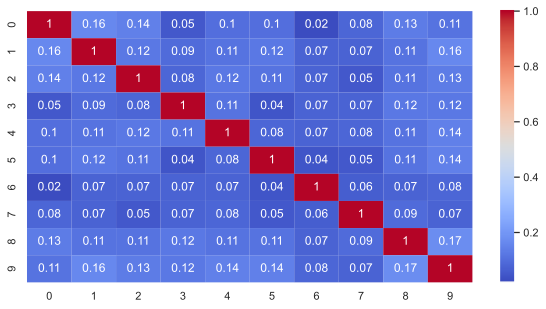

In [164]:
plt.figure(figsize=(10,5))
smaller_matrix = matrix_df.iloc[0:10, 0:10]
ax.set(title="Heatmap Jaccard Index of Last Statements",
      xlabel="Execution number",
      ylabel="Execution number")
ax = sns.heatmap(smaller_matrix, cmap="coolwarm",annot = True)

In [129]:
matrix_df

0     1     2     3     4     5     6     7     8     9   ...    70  \
0   1.00  0.16  0.14  0.05  0.10  0.10  0.02  0.08  0.13  0.11  ...  0.14   
1   0.16  1.00  0.12  0.09  0.11  0.12  0.07  0.07  0.11  0.16  ...  0.15   
2   0.14  0.12  1.00  0.08  0.12  0.11  0.07  0.05  0.11  0.13  ...  0.11   
3   0.05  0.09  0.08  1.00  0.11  0.04  0.07  0.07  0.12  0.12  ...  0.10   
4   0.10  0.11  0.12  0.11  1.00  0.08  0.07  0.08  0.11  0.14  ...  0.12   
..   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
75  0.08  0.08  0.10  0.12  0.10  0.08  0.07  0.07  0.11  0.11  ...  0.14   
76  0.06  0.08  0.10  0.07  0.07  0.05  0.04  0.05  0.06  0.10  ...  0.08   
77  0.11  0.07  0.11  0.09  0.11  0.07  0.04  0.05  0.12  0.12  ...  0.07   
78  0.04  0.11  0.13  0.09  0.10  0.15  0.03  0.03  0.10  0.12  ...  0.08   
79  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.00   

      71    72    73    74    75    76    77    78   79  
0   0.12  0.03  0.17  0.07  0.08  0.06  0.11  0.04  0.0  
1   0.16  0.03  0.17  0.08  0.08  0.08  0.07  0.11  0.0  
2   0.07  0.04  0.16  0.13  0.10  0.10  0.11  0.13  0.0  
3   0.14  0.06  0.12  0.06  0.12  0.07  0.09  0.09  0.0  
4   0.12  0.07  0.13  0.12  0.10  0.07  0.11  0.10  0.0  
..   ...   ...   ...   ...   ...   ...   ...   ...  ...  
75  0.13  0.05  0.12  0.09  1.00  0.08  0.11  0.13  0.0  
76  0.12  0.06  0.12  0.11  0.08  1.00  0.09  0.09  0.0  
77  0.09  0.02  0.15  0.11  0.11  0.09  1.00  0.11  0.0  
78  0.10  0.03  0.14  0.08  0.13  0.09  0.11  1.00  0.0  
79  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.0  

[80 rows x 80 columns]